# HW - Natural Language Processing

----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*

----------------------------------------------------
**Student:** María González Garcia

----------------------------------------------------

In this project we are going to use the techniques and methods for  text preprocessing. For this purpose, we will focus on solving a tweet classification task.


In [ ]:
%matplotlib inline
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Classification of tweets

In this HW we are going to work with a text classification problem. Specifically, we are going to classify tweets into two categories based on what they have been liked.

To start working with this database, run the following cell to load the data file into a dataframe.

In [ ]:
tweets_df = pd.read_csv('http://www.tsc.uc3m.es/~vanessa/data_notebooks/nlp/tweets.csv')
tweets_df = tweets_df.drop(columns=['id', 'keyword', 'location']).rename(columns={'text': 'tweet', 'target':'labels'})
tweets_df

,tweet,labels
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


## 1.1 Preprocessing of tweets  


Here, we are going to apply the standard preprocessing seen in class for tokenization, cleaning and homogenization of texts. To do so, define a function that implements this process and apply it to the corpus. You can use either standard Python functions, NLTK toolbox  or SpaCY library for this step.

After the preprocessing, check the content of the lemmatized tweets and remove all the entries (tweets) with less than 2 tokens/lemmas.


In [ ]:
import spacy

# We load the model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def normalize_Spacy(text):
  tokens=nlp(text)
  lemmas= [token.lemma_ for token in tokens if token.is_alpha or token.is_digit and not token.is_punct and not token.is_stop]
  return lemmas

In [ ]:
tweets=tweets_df['tweet']
labels = tweets_df['labels'].tolist()

corpus_prec=[normalize_Spacy(t) for t in tweets]

In [ ]:
# Remove tweets with less than 2 tokens
labels_tweets = [(labels[i],t) for i,t in enumerate(corpus_prec) if len(t)>=2]
labels, corpus_prec = zip(*labels_tweets)
N = len(tweets) # total number of tweets

In [ ]:
print(labels)

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
corpus_prec[0]

['our',
 'deed',
 'be',
 'the',
 'Reason',
 'of',
 'this',
 'earthquake',
 'may',
 'ALLAH',
 'forgive',
 'we',
 'all']

## 1.2 Vectorization of documents

The next step in our pipeline is the vectorization of the tweets we have just processed to obtain their BoW and TF-IDF representation. To do this, start by generating a dictionary to then obtain the BoW representation and then the TF-IDF representation.

For the creation of the dictionary, it is recommended to eliminate the terms that you consider not relevant and, in addition, to limit its size to 2000 tokens. Please justify how you do this process.

In [ ]:
import gensim
from gensim.models import TfidfModel

# Create dictionary of tokens: the input is the preprocessed corpus


D = gensim.corpora.Dictionary(corpus_prec)

D.filter_extremes(keep_n=2000)

corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

model = TfidfModel(corpus_bow)

corpus_tfidf = model[corpus_bow]

In [ ]:
corpus_tfidf[0]

[(0, 0.33728202334622115),
 (1, 0.12319030228076298),
 (2, 0.521609125807588),
 (3, 0.44803657739719865),
 (4, 0.15133864234342578),
 (5, 0.4314054082343371),
 (6, 0.11314602709719827),
 (7, 0.27774185887611724),
 (8, 0.31511197501820504)]

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc
n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T # documents x tokens
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

## 1.3 Classification with TF_IDF

Finally, use the follwing classfiers to solve the tweet classification problem:

* Naive Bayes classifier (you can use its standard or complementary version)
* A logistic regression (LR) classifier (use the 'liblinear' solver to avoid convergence problems).
* A PCA + LR classifier.

Compare the performances, in terms of accuracy, when using the TF-IDF representation. To analyze the performance of the model, split each data corpus into a 60%/40% (training/test) partition. To simplify the generation of the train/test partitions for the different schemes, use indexing provided in the following cell.

Finally, compare and comment on the results obtained.  Which approach do you think that works better? Analyze performance vs complexity.

In [ ]:
from sklearn.model_selection import train_test_split
# Divide the data into train test partitions
id_tot = np.arange(corpus_tfidf_dense.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)

Y=np.array(labels)

X_train = corpus_tfidf_dense[id_train,:]
X_test = corpus_tfidf_dense[id_test,:]
y_train = Y[id_train]
y_test = Y[id_test]

In [ ]:
#@title:Naive Bayes

from sklearn.naive_bayes import MultinomialNB, ComplementNB

clf_m = MultinomialNB().fit(X_train,y_train)
clf_c = ComplementNB().fit(X_train,y_train)
acc_multi=clf_m.score(X_test,y_test)
acc_comp=clf_c.score(X_test,y_test)

print("Accuracy in Multinomial Naive Bayes: ",acc_multi)
print("Accuracy in Complement Naive Bayes: ",acc_comp)

Accuracy in Multinomial Naive Bayes:  0.7877887788778878
Accuracy in Complement Naive Bayes:  0.7874587458745874


In [ ]:
#@title:Logistic Regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, y_train)

acc_log=clf.score(X_test,y_test)
print("Accuracy in Logistic Regression: ",acc_log)

Accuracy in Logistic Regression:  0.7910891089108911


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

my_pca=PCA().fit(X_train)
P_train=my_pca.transform(X_train)
P_test=my_pca.transform(X_test)
params=[{"C":[1,1.5,2,2.5,3,3.5,4,4.5,5]}]
clf_pca = GridSearchCV(LogisticRegression(random_state=0,solver='liblinear'),param_grid=params)
acc_log_pca_test=[]
acc_log_pca_train=[]
acc_log_pca_val=[]
for k in range(1,P_train.shape[1],50):
  clf_pca.fit(P_train[:,:k+1],y_train)
  acc_log_pca_test.append(clf_pca.score(P_test[:,:k+1],y_test))
  acc_log_pca_train.append(clf_pca.score(P_train[:,:k+1],y_train))
  acc_log_pca_val.append(clf_pca.best_score_)


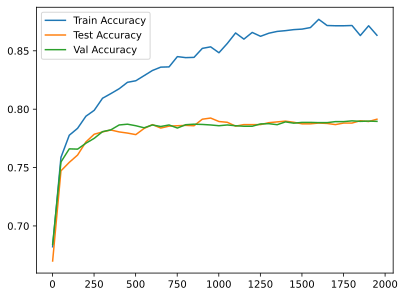

In [ ]:
rang=range(1,P_train.shape[1],50)

plt.plot(rang,acc_log_pca_train, label="Train Accuracy")
plt.plot(rang,acc_log_pca_test, label="Test Accuracy")
plt.plot(rang,acc_log_pca_val, label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
k_opt = rang[np.argmax(np.array(acc_log_pca_val))]
print('The optimum value of K is %d' %k_opt)

print('The test performance is %2.2f' %acc_log_pca_test[np.argmax(np.array(acc_log_pca_val))])

The optimum value of K is 1801
The test performance is 0.79


**Answer:**  

We can see that Logistic Regression obtains the highest accuracy 0.79. However, the complementary and multinomial Naive Bayes obtain 0.787.

The PCA in a Logistic Regression maps the input feature into a low-dimensional space, reducing the number of features, the complexity of the model and captures relevant information. In the figure above we can see the accuracy in training, validation and test using different numbers of PCA features, and reducing to 1801 the model obtain the best accuracy.

## 1.4 Classification with LSA

Now, from the TF-IDF vectorization, compute the LSA representation of each tweet. Apply a CV to select the optimal dimension of the LSA representation.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=X_train.shape[1]).fit(X_train)
T_train = svd.transform(X_train)
T_test = svd.transform(X_test)

params=[{"C":[1,1.5,2,2.5,3,3.5,4,4.5,5]}]
clf_lsa = GridSearchCV(LogisticRegression(random_state=0,solver='liblinear'),param_grid=params)
acc_log_lsa_test=[]
acc_log_lsa_train=[]
acc_log_lsa_val=[]

for k in range(1,T_train.shape[1],50):
  clf_lsa.fit(T_train[:,:k+1],y_train)
  acc_log_lsa_test.append(clf_lsa.score(T_test[:,:k+1],y_test))
  acc_log_lsa_train.append(clf_lsa.score(T_train[:,:k+1],y_train))
  acc_log_lsa_val.append(clf_lsa.best_score_)

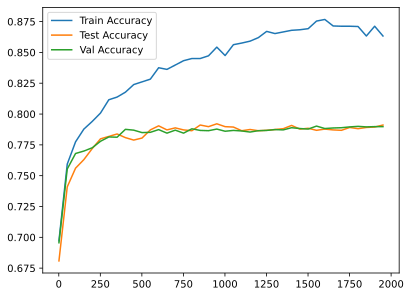

In [ ]:
rang=range(1,T_train.shape[1],50)

plt.plot(rang,acc_log_lsa_train, label="Train Accuracy")
plt.plot(rang,acc_log_lsa_test, label="Test Accuracy")
plt.plot(rang,acc_log_lsa_val, label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
k_opt = rang[np.argmax(np.array(acc_log_lsa_val))]
print('The optimum value of K is %d' %k_opt)

print('The test performance is %2.2f' %acc_log_lsa_test[np.argmax(np.array(acc_log_lsa_val))])

The optimum value of K is 1551
The test performance is 0.79


## 1.5 Classification with Word Emdeddings

In this section we are going to obtain the *Word2Vec* representation to obtain an *embedding* of the words/tokens/lemmas in our corpus of *tweets* and then use this representation to predict the class of each *tweet*.

To do so, solve the following sections:

###  1.5.1 *Word2Vec* of the words in the corpus of *tweets*.

Use a pre-trained model (you can load it directly in Gensim or use it from Spacy) and obtain the Word2Vec of the tokens of each tweet.

In [ ]:
import gensim.downloader
ft_en = gensim.downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
word2vec_embeddings = []

for tokens in corpus_prec:
    token_vectors = []
    for token in tokens:
        if token in ft_en:
            token_vector = ft_en[token]
        else:
            #token_vector = ft_en.get_vector(token)
            #print(token)
            token_vector = np.zeros(ft_en.vector_size)

        token_vectors.append(token_vector)
    word2vec_embeddings.append(token_vectors)

### 1.5.2 *Word2Vec* of the *tweets*.

To obtain a unique vector for document, average the word2vec of all the tokens of each tweet.

In [ ]:
averaged_word2vec_embeddings = []

for tokens in corpus_prec:
    token_vectors = []
    for token in tokens:
        if token in ft_en:
            token_vector = ft_en[token]
        else:
            #token_vector = ft_en.get_vector(token)
            #print(token)
            token_vector = np.zeros(ft_en.vector_size)

        token_vectors.append(token_vector)

    averaged_word2vec_embeddings.append(np.mean(token_vectors, axis=0))

### 1.5.3 Classification with LR

Compute the performance of the LR model using this vectorization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(averaged_word2vec_embeddings, labels, test_size=0.2, random_state=42)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

accuracy = lr_model.score(X_test, y_test)

print(f"LR Model Accuracy: {accuracy}")

LR Model Accuracy: 0.7808580858085808


## 1.6 Classification with Doc2Vec

Finally, let's use a doc2vec vectorization to analyze its classfication capability. So, train a Doc2Vec model with the tweet's corpus and later analize the performance of the LR classifier.

In [63]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_prec)]

model = Doc2Vec(documents, vector_size=150,epochs=10)

In [64]:
doc2vec_embeddings = [model.infer_vector(words) for words in corpus_prec]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(doc2vec_embeddings, labels, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

accuracy = lr_model.score(X_test, y_test)

print(f"LR Model Accuracy: {accuracy}")

LR Model Accuracy: 0.7115511551155116


## 1.7 Performance analysis

Discuss the performance of embedding-based vectorization and compare them with the results of Section 1.3. Why do you think we failed to improve on the previous schemes?

In [66]:
results = pd.DataFrame({
    'Model': ['Accuracy'],
    'Naive Bayes Multinommial': [0.7877],
    'Naive Bayes Complement':[0.7874],
    'LR':[0.791],
    'LR+PCA':[0.79],
    'LR+LSA':[0.79],
    'Word2Vec':[0.78],
    'Doc2Vec':[0.711]

})

results

,Model,Naive Bayes Multinommial,Naive Bayes Complement,LR,LR+PCA,LR+LSA,Word2Vec,Doc2Vec
0,Accuracy,0.7877,0.7874,0.791,0.79,0.79,0.78,0.711


**Answer:** We can observe differences in terms of accuracy using Word2Vec and Doc2Vec. While Word2Vec captures semantic relationships based on the local context, Doc2Vec captures the global context of the document/tweet. The reason for these results may be due to the fact that the import relationships are found in small fragments and not in the whole tweet.

The TFIDF transformation into a logistic regression achieves higher accuracy than the Doc2Vec and Word2Vec method. One reason may be that Doc2Vec generates fixed-size vectors for documents/tweets and tweets vary in length, so they may have difficulty capturing important information. Also, there is not enough context in the tweets for the model to learn context information to make better predictions.